<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter02/02_Policy_Evaluation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[PE2-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[PE2-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=6, traps=[]):
    self.size = size    
    self.traps = traps
    self.start = (0, 0)
    self.goal = (size-1, size-1)

    self.states = [(x, y) for x in range(size) for y in range(size)]
    self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    self.policy = {}
    for s in self.states:
      self.policy[(s, (-1, 0))] = 0
      self.policy[(s, (0, -1))] = 0
      self.policy[(s, (1, 0))] = 1/2
      self.policy[(s, (0, 1))] = 1/2

    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s == self.goal:
      return 0, s             # Reward, Next state

    s_new = (s[0] + a[0], s[1] + a[1])

    if s_new not in self.states:
      return 0, s             # Reward, Next state

    if s_new in self.traps:
      return -1, self.start   # Reward, Next state

    return -1, s_new          # Reward, Next state

**[PE2-03]**

Define a function to show state values.

In [0]:
def show_values(world, subplot=None, title='Values'):
  if not subplot:
    fig = plt.figure(figsize=(world.size*0.8, world.size*0.8))
    subplot = fig.add_subplot(1, 1, 1)

  result = np.zeros([world.size, world.size])
  for (x, y) in world.states:
    if (x, y) in world.traps:
      result[y][x] = None
    else:
      result[y][x]  = world.value[(x, y)]
  sns.heatmap(result, square=True, cbar=False,
              annot=True, fmt='3.1f', cmap='coolwarm',
              ax=subplot).set_title(title)

**[PE2-04]**

Define a function to apply the policy evaluation algorithm until conversion.

In [0]:
def policy_eval(world, gamma=1, delta=0.01):
  while True:
    delta_max = 0
    for s in world.states:
      v_new = 0
      for a in world.actions:
        r, s_new = world.move(s, a)
        v_new += world.policy[(s, a)] * (r + gamma * world.value[s_new])
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new

    if delta_max < delta:
      break

**[PE2-05]**

Create a gridworld instance, and apply the policy evaluation algorithm.

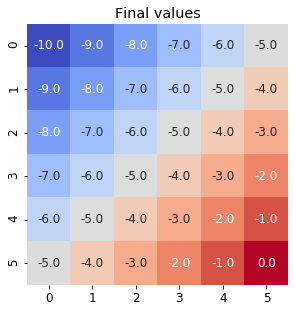

In [0]:
world = Gridworld(size=6)
policy_eval(world)
show_values(world, title='Final values')

**[PE2-06]**

Create a Gridworld instance with a trap hole, and apply the policy evaluation algorithm.

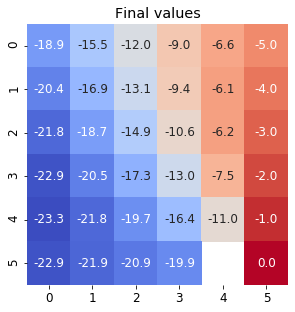

In [0]:
world = Gridworld(size=6, traps=[(4, 5)])
policy_eval(world)
show_values(world, title='Final values')

**[PE2-07]**

Create a Gridworld instance with a trap wall, and apply the policy evaluation algorithm.

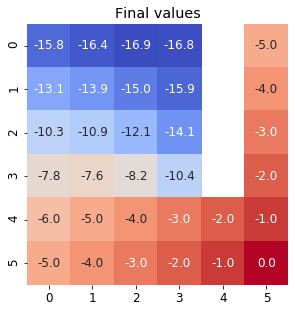

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)])
policy_eval(world)
show_values(world, title='Final values')